## I confirm that this is my own work, except where clearly indicated.

### Importing packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import math
import seaborn as sns

### Reading the data in, and splitting into training and testing sets

In [2]:
input_data = pd.read_csv("train.csv")

In [3]:
input_data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [4]:
# Drop ID 
input_data = input_data.drop("id", axis=1)

In [5]:
input_data["target"].unique()

array([0, 1])

In [6]:
Y = input_data["target"]
X = input_data.iloc[:,1:]

In [7]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, stratify=Y, test_size=0.30, random_state=42)

In [8]:
X_Train.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,...,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000
mean,1.900295,1.358888,4.421207,0.417319,0.406293,0.392898,0.257227,0.164206,0.185670,0.000391,...,5.440413,1.440869,2.873142,7.537458,0.121973,0.628420,0.554055,0.287178,0.349043,0.153153
std,1.984169,0.664198,2.698962,0.493380,1.352404,0.488395,0.437106,0.370463,0.388841,0.019775,...,2.330926,1.201221,1.695121,2.748044,0.327256,0.483228,0.497070,0.452446,0.476668,0.360136
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
list_of_missing = []
for col in X_Train.columns:
    if "cat" in col:
        X_Train[col] = pd.Categorical(X_Train[col])
        
    total = X_Train[X_Train[col] == -1].count()
    if total[0] > 0: 
        list_of_missing.append((col, total[0]/len(X_Train)))

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
list_of_missing.sort(key = lambda x: x[1]) 
list_of_missing

[('ps_car_11', 7.200322574451335e-06),
 ('ps_car_02_cat', 9.600430099268447e-06),
 ('ps_ind_04_cat', 0.00012960580634012404),
 ('ps_car_01_cat', 0.00017520784931164917),
 ('ps_ind_02_cat', 0.00033841516099921277),
 ('ps_car_09_cat', 0.0009744436550757474),
 ('ps_ind_05_cat', 0.00963163149709107),
 ('ps_car_07_cat', 0.0192296614888347),
 ('ps_car_14', 0.07168161133618786),
 ('ps_reg_03', 0.18111691403774888),
 ('ps_car_05_cat', 0.4475432499375972),
 ('ps_car_03_cat', 0.6908949520938538)]

In [11]:
# remove 3 highest columns, replace the rest with the mean for non categorical data 
# and the mode for categorical data 
X_Train = X_Train.drop(["ps_car_03_cat","ps_car_05_cat", "ps_reg_03"], axis=1)

In [12]:
X_Test = X_Test.drop(["ps_car_03_cat","ps_car_05_cat", "ps_reg_03"], axis=1)

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
for i in list_of_missing[0:-3]:
    name = i[0]
    if "cat" in name:
        imp = SimpleImputer(missing_values=-1, strategy='median')
    else:
        imp = SimpleImputer(missing_values=-1, strategy='mean')
        
    X_Train[name] = imp.fit_transform(X_Train[[name]])
    X_Test[name]  = imp.transform(X_Test[[name]])

In [15]:
mask = np.column_stack([X_Train[col] == -1 for col in X_Train])
X_Train.loc[mask.any(axis=1)]

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin


In [16]:
X_Train.dtypes

ps_ind_01            int64
ps_ind_02_cat      float64
ps_ind_03            int64
ps_ind_04_cat      float64
ps_ind_05_cat      float64
ps_ind_06_bin        int64
ps_ind_07_bin        int64
ps_ind_08_bin        int64
ps_ind_09_bin        int64
ps_ind_10_bin        int64
ps_ind_11_bin        int64
ps_ind_12_bin        int64
ps_ind_13_bin        int64
ps_ind_14            int64
ps_ind_15            int64
ps_ind_16_bin        int64
ps_ind_17_bin        int64
ps_ind_18_bin        int64
ps_reg_01          float64
ps_reg_02          float64
ps_car_01_cat      float64
ps_car_02_cat      float64
ps_car_04_cat     category
ps_car_06_cat     category
ps_car_07_cat      float64
ps_car_08_cat     category
ps_car_09_cat      float64
ps_car_10_cat     category
ps_car_11_cat     category
ps_car_11          float64
ps_car_12          float64
ps_car_13          float64
ps_car_14          float64
ps_car_15          float64
ps_calc_01         float64
ps_calc_02         float64
ps_calc_03         float64
p

## Perform Further Feature Selection

#### Using Extra Trees

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [18]:
clf = ExtraTreesClassifier(n_estimators=50)

In [19]:
clf = clf.fit(X_Train, Y_Train)

Feature ranking:


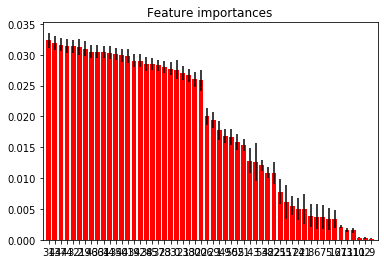

In [20]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# for f in range(X_Train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_Train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_Train.shape[1]), indices)
plt.xlim([-1, X_Train.shape[1]])
plt.show()

In [21]:
np.mean(importances)

0.01851851851851852

In [22]:
model = SelectFromModel(clf, prefit=True)

In [23]:
column_indices = model.get_support(indices=False)    # this will return boolean mask for the columns
X_new = X_Train.loc[:, column_indices]                      # the sliced dataframe, keeping selected columns
col_names = X_new.columns   
col_names

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02',
       'ps_car_01_cat', 'ps_car_06_cat', 'ps_car_09_cat', 'ps_car_11_cat',
       'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14'],
      dtype='object')

In [24]:
X_Train_Shaped = model.transform(X_Train)
X_Train_Shaped.shape    

(416648, 28)

In [25]:
X_Train_Shaped

array([[1, 7, 7, ..., 3, 3, 7],
       [5, 3, 7, ..., 3, 3, 7],
       [3, 7, 11, ..., 4, 2, 7],
       ...,
       [1, 2, 8, ..., 0, 0, 6],
       [3, 3, 7, ..., 0, 2, 9],
       [2, 7, 6, ..., 0, 2, 14]], dtype=object)

In [26]:
X_Test_Shaped = model.transform(X_Test)

In [27]:
X_Train_Shaped = pd.DataFrame(X_Train_Shaped)
X_Test_Shaped = pd.DataFrame(X_Test_Shaped)


In [28]:
X_Test_Shaped.columns = col_names
X_Train_Shaped.columns = col_names

In [29]:
list_of_cols = [x for x in X_Train_Shaped.columns if "cat" in x]

In [30]:
import scipy.stats as st

In [31]:
spearman_corr = []
for col in X_Train_Shaped.columns:
    spearman_corr.append((col, st.spearmanr(X_Train_Shaped[col], Y_Train)[1]))                       

Text(0, 0.5, 'Correlation')

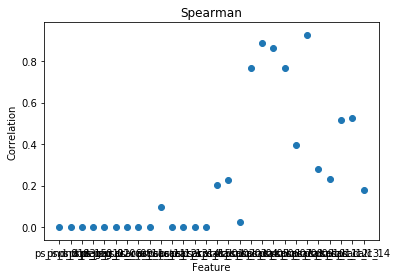

In [32]:
plt.scatter(X_Train_Shaped.columns, [x[1] for x in spearman_corr])
plt.title("Spearman")
plt.xlabel("Feature")
plt.ylabel("Correlation")

This suggests to remove all calculated fields effectively

In [33]:
list_to_remove = []
for i in filter(lambda x: x[1] >=0.05,spearman_corr):
    list_to_remove.append(i[0])

In [34]:
list_to_remove

['ps_car_11',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [35]:
X_Train_Shaped = X_Train_Shaped.drop(list_to_remove, axis=1)

In [36]:
X_Train_Shaped

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_06_cat,ps_car_09_cat,ps_car_11_cat,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03
0,1,7,7,0.9,0.3,11,9,2,104,0.4,0.970058,0.374672,3.74166,0.2
1,5,3,7,0.7,0.2,7,11,2,104,0.447214,0.805033,0.424617,3,0.9
2,3,7,11,0.2,0.3,11,6,0,27,0.374166,0.784443,0.390768,3.31662,0.3
3,2,5,11,0.6,0.2,11,0,2,37,0.316228,0.757518,0.3755,3.31662,0
4,5,5,6,0.9,0.3,7,1,2,104,0.43589,0.830289,0.414126,3.16228,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416643,1,3,8,0.5,0.2,7,0,2,87,0.316228,0.720637,0.294449,3.4641,0.5
416644,2,7,5,0.3,0.1,11,15,2,41,0.547723,1.38223,0.532917,3,0.7
416645,1,2,8,0.4,0,6,1,0,74,0.374166,0.777193,0.371618,3.4641,0.5
416646,3,3,7,0.3,0,0,1,0,90,0.374166,0.740533,0.416653,3.16228,0.1


In [37]:
X_Test_Shaped = X_Test_Shaped.drop(list_to_remove, axis=1)

In [38]:
X_Train_Shaped.dtypes

ps_ind_01        object
ps_ind_03        object
ps_ind_15        object
ps_reg_01        object
ps_reg_02        object
ps_car_01_cat    object
ps_car_06_cat    object
ps_car_09_cat    object
ps_car_11_cat    object
ps_car_12        object
ps_car_13        object
ps_car_14        object
ps_car_15        object
ps_calc_03       object
dtype: object

In [39]:
for col in X_Train_Shaped.columns:
    if "cat" in col:
        X_Train_Shaped[col] = pd.Categorical(X_Train_Shaped[col])
    elif "ind" in col:
        X_Train_Shaped[col] = X_Train_Shaped[col].astype("int64")
    else:
        X_Train_Shaped[col] = X_Train_Shaped[col].astype("float64")

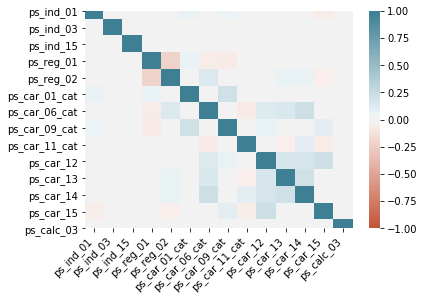

In [40]:
corr = X_Train_Shaped.apply(lambda x : pd.factorize(x)[0]).corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [41]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_06_cat,ps_car_09_cat,ps_car_11_cat,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03
ps_ind_01,1,-0.0038,0.0039,-0.0025,0.018,0.072,0.017,0.062,0.016,0.019,0.02,0.03,-0.057,-0.0024
ps_ind_03,-0.0038,1,-0.03,0.0076,0.029,-0.005,-0.019,-0.016,-0.017,-0.0094,-0.026,-0.032,0.016,0.0007
ps_ind_15,0.0039,-0.03,1,0.0053,-0.019,0.0074,-0.0025,0.022,-0.0016,0.013,-2.3e-05,-0.0013,0.025,0.0012
ps_reg_01,-0.0025,0.0076,0.0053,1,-0.22,0.063,-0.052,-0.065,-0.011,-0.0085,-0.0036,-0.02,-0.0089,0.0021
ps_reg_02,0.018,0.029,-0.019,-0.22,1,-0.012,0.15,0.0045,-0.0027,0.025,0.077,0.074,-0.042,0.0016
ps_car_01_cat,0.072,-0.005,0.0074,0.063,-0.012,1,0.0031,0.21,-0.012,0.024,0.0093,0.0022,0.0087,0.00048
ps_car_06_cat,0.017,-0.019,-0.0025,-0.052,0.15,0.0031,1,0.01,-0.068,0.13,0.15,0.22,-0.025,0.00032
ps_car_09_cat,0.062,-0.016,0.022,-0.065,0.0045,0.21,0.01,1,-0.013,0.075,0.022,0.015,0.095,-0.00056
ps_car_11_cat,0.016,-0.017,-0.0016,-0.011,-0.0027,-0.012,-0.068,-0.013,1,-0.026,-0.043,0.094,-0.06,0.0029
ps_car_12,0.019,-0.0094,0.013,-0.0085,0.025,0.024,0.13,0.075,-0.026,1,0.16,0.17,0.23,-0.00035


## One Hot Encoding

In [42]:
X_Train_Shaped.shape

(416648, 14)

In [43]:
X_Train_Shaped = pd.get_dummies(X_Train_Shaped, columns=list_of_cols)
X_Test_Shaped = pd.get_dummies(X_Test_Shaped, columns=list_of_cols)

In [44]:
X_Train_Shaped.shape

(416648, 149)

# GINI
https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/41029

# More Imports and code

In [45]:
from sklearn import tree 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from plotml import * 

In [209]:
def make_confusion_matrix(Y_Test, Y_Pred, title="Confusion Matrix Of Target Accuracy"):
    cm = confusion_matrix(Y_Test, Y_Pred)
    plot_confusion_matrix(cm, labels=[0,1], title=title, cmap=plt.cm.Blues)

In [47]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

def get_gini(Y_Test, Y_Pred):
    fpr, tpr, thresholds = roc_curve(Y_Test, Y_Pred)
    AUC = auc(fpr, tpr)
    gini = 2*AUC - 1
    print(gini)

# Classification

In [48]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Y_Train),
                                                 Y_Train)

print(class_weights)

[ 0.51891337 13.71816146]


In [49]:
class_weights = dict(enumerate(class_weights))

## Decision Tree -> Class Weights

In [ ]:
tree_class_weights = tree.DecisionTreeClassifier(class_weight = class_weights)
tree_class_weights.fit(X_Train_Shaped, Y_Train)

In [ ]:
K = 5
scores = cross_val_score(tree_class_weights, X_Train_Shaped, Y_Train, scoring='roc_auc', n_jobs=-1, cv=K)
print(scores)

In [ ]:
Y_Pred_tree_class_weights = tree_class_weights.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, Y_Pred_tree_class_weights)

In [ ]:
get_gini(Y_Test, Y_Pred_tree_class_weights)

## Random Forest -> Class Weighted

In [ ]:
forest = RandomForestClassifier(class_weight=class_weights)

In [ ]:
forest.fit(X_Train_Shaped, Y_Train)

In [ ]:
K = 5
scores = cross_val_score(forest, X_Train_Shaped, Y_Train,scoring='roc_auc', cv=K)
scores

In [ ]:
forest_pred = forest.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, forest_pred)

In [ ]:
get_gini(Y_Test, forest_pred)

## Logistic regression

In [201]:
regr = LogisticRegression(class_weight=class_weights, max_iter=500)
regr.fit(X_Train_Shaped, Y_Train)

LogisticRegression(C=1.0,
                   class_weight={0: 0.5189137183227522, 1: 13.717919170302082},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=500, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [206]:
K = 5
scores = cross_val_score(regr, X_Train_Shaped, Y_Train, scoring='roc_auc', cv=K)
scores

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

array([0.60542254, 0.61191664, 0.60810423, 0.60376175, 0.59830924])

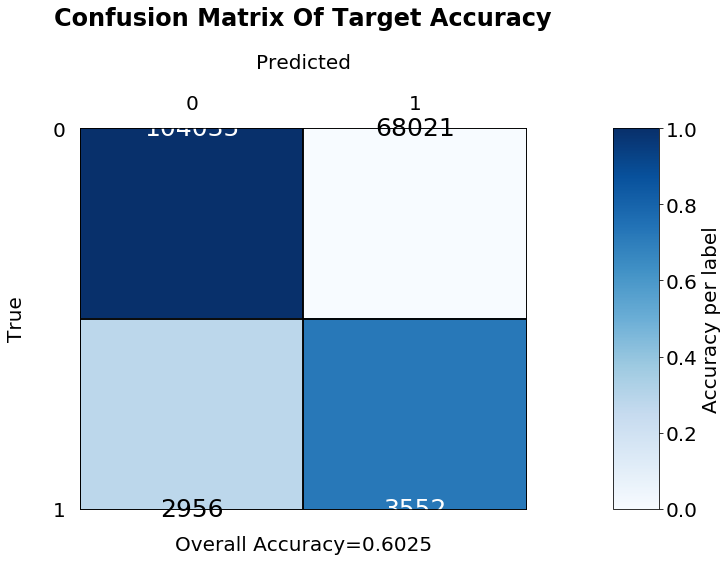

0.41831372009105217


In [207]:
pred_regr = regr.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, pred_regr)

In [208]:
get_gini(Y_Test, pred_regr)

0.15044758300987993


# Now oversampling/Undersampling the data

In [216]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=7)
over_x, over_y = sm.fit_sample(X_Train_Shaped, Y_Train)


In [217]:
import seaborn as sns

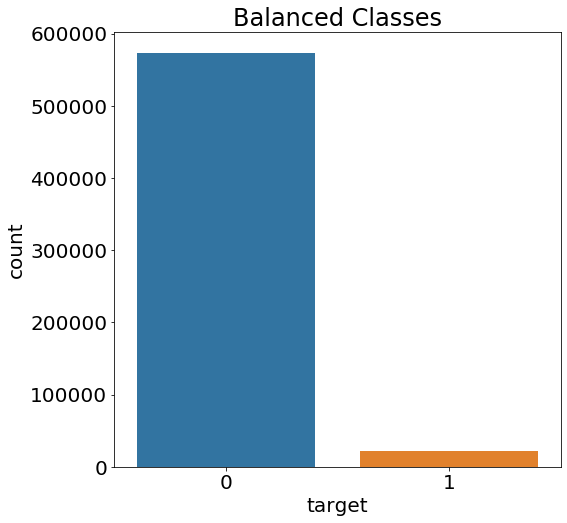

In [218]:
plt.figure(figsize=(8, 8))
sns.countplot('target', data=input_data)
plt.title('Balanced Classes')
plt.show()

In [219]:
over_y = pd.DataFrame(oversampled_trainY)
over_y.columns = ["target"]

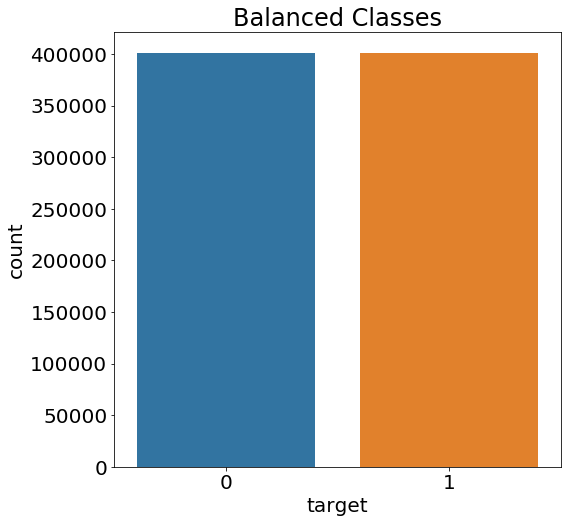

In [220]:
plt.figure(figsize=(8, 8))
sns.countplot('target', data=new_y)
plt.title('Balanced Classes')
plt.show()

## Undersampling

In [221]:
merged = pd.concat([X_Train_Shaped.reset_index(drop=True), Y_Train.reset_index(drop=True)], axis=1)

In [222]:
merged

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
0,1,7,7,0.9,0.3,0.400000,0.970058,0.374672,3.741657,0.2,...,0,0,0,0,0,0,0,0,1,0
1,5,3,7,0.7,0.2,0.447214,0.805033,0.424617,3.000000,0.9,...,0,0,0,0,0,0,0,0,1,0
2,3,7,11,0.2,0.3,0.374166,0.784443,0.390768,3.316625,0.3,...,0,0,0,0,0,0,0,0,0,0
3,2,5,11,0.6,0.2,0.316228,0.757518,0.375500,3.316625,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,6,0.9,0.3,0.435890,0.830289,0.414126,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416643,1,3,8,0.5,0.2,0.316228,0.720637,0.294449,3.464102,0.5,...,0,0,0,0,0,0,0,0,0,0
416644,2,7,5,0.3,0.1,0.547723,1.382229,0.532917,3.000000,0.7,...,0,0,0,0,0,0,0,0,0,0
416645,1,2,8,0.4,0.0,0.374166,0.777193,0.371618,3.464102,0.5,...,0,0,0,0,0,0,0,0,0,0
416646,3,3,7,0.3,0.0,0.374166,0.740533,0.416653,3.162278,0.1,...,0,0,0,0,0,0,0,0,0,0


In [223]:
x_1 = merged[merged["target"] == 1]
x_0 = merged[merged["target"] == 0]

In [224]:
x_0_subsampled = x_0.sample(n=len(x_1),random_state=42)

In [225]:
x_0_subsampled

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
210390,6,9,11,0.7,0.8,0.400000,0.867074,0.369865,3.464102,0.0,...,0,0,0,0,0,0,0,0,0,0
133776,2,8,9,0.9,0.6,0.374166,0.726121,0.393700,2.828427,0.9,...,0,0,0,0,0,0,0,0,0,0
403903,0,8,5,0.9,0.2,0.424264,0.740226,0.429535,2.828427,0.4,...,0,0,0,0,0,0,0,0,0,0
293033,2,2,7,0.7,0.9,0.374166,0.705615,0.388716,3.316625,0.7,...,0,0,0,0,0,0,0,0,0,0
181842,2,4,0,0.8,0.3,0.400000,0.761157,0.379473,3.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406787,0,1,8,0.4,0.2,0.445870,0.852258,0.348855,3.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
39033,2,4,5,0.9,1.0,0.374166,0.769337,0.384968,3.316625,0.3,...,0,0,0,0,0,1,0,0,0,0
3840,0,4,7,0.2,0.1,0.446990,0.767496,0.344964,2.449490,0.2,...,0,0,0,0,0,0,0,0,1,0
302578,5,3,11,0.9,1.2,0.424264,0.823493,0.393446,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,0


In [227]:
under_x = x_1.append(x_0_subsampled)

In [228]:
under_x

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
4,5,5,6,0.9,0.3,0.435890,0.830289,0.414126,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,1
8,5,5,1,0.1,0.2,0.547723,1.769489,0.532917,3.605551,0.5,...,0,0,0,0,0,0,0,0,0,1
56,2,5,0,0.3,0.4,0.424264,0.947089,0.418569,2.828427,0.8,...,0,0,0,0,0,0,0,0,0,1
134,1,3,4,0.4,1.0,0.447214,0.986479,0.427200,3.464102,0.5,...,0,0,0,0,0,0,0,0,0,1
212,7,5,13,0.9,0.8,0.400000,0.606337,0.322490,2.645751,0.8,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406787,0,1,8,0.4,0.2,0.445870,0.852258,0.348855,3.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
39033,2,4,5,0.9,1.0,0.374166,0.769337,0.384968,3.316625,0.3,...,0,0,0,0,0,1,0,0,0,0
3840,0,4,7,0.2,0.1,0.446990,0.767496,0.344964,2.449490,0.2,...,0,0,0,0,0,0,0,0,1,0
302578,5,3,11,0.9,1.2,0.424264,0.823493,0.393446,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,0


In [230]:
under_y = under_x["target"]

In [231]:
under_x = under_x.drop("target", axis=1)

In [232]:
under_x.shape

(30372, 149)

In [233]:
under_y.shape

(30372,)

## Running Logistic Regression on the Over and Under Sampled data

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(over_x)
x_test = scaler.transform(X_Test_Shaped)

### Oversampling run

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (stat

[0.87753608 0.95947841 0.96016835 0.96012312 0.96032143]


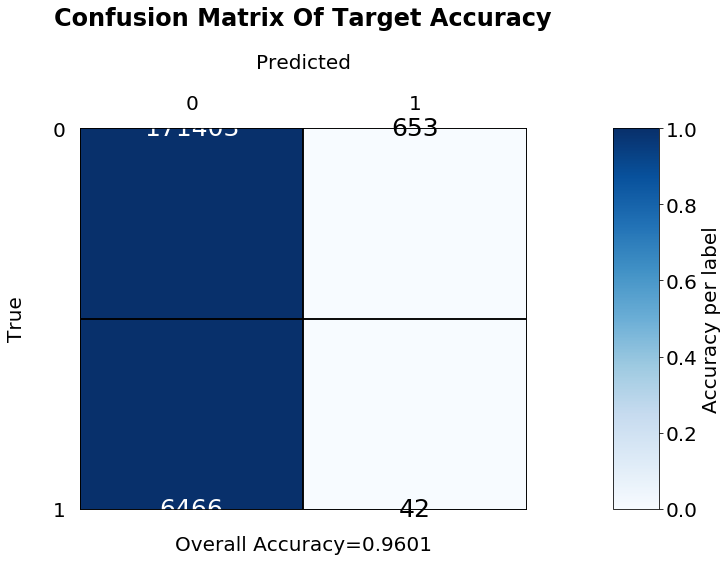

0.002658319618012106


In [235]:
regr = LogisticRegression(max_iter=500)
regr.fit(over_x, np.ravel(over_y))

K = 5
scores = cross_val_score(regr, over_x, over_y, scoring="roc_auc", cv=K)
print(scores)

pred_regr = regr.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, pred_regr)

get_gini(Y_Test, pred_regr)

### Undersampling Run

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

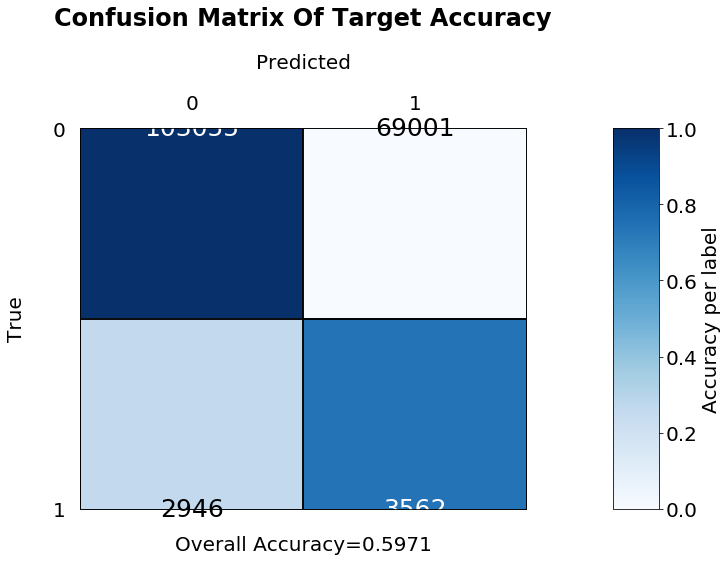

0.14628833341921021


In [236]:
regr = LogisticRegression(max_iter=500)
regr.fit(under_x, under_y)

K = 5
scores = cross_val_score(regr, under_x, under_y, scoring="roc_auc", cv=K)
scores

pred_regr = regr.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, pred_regr)

get_gini(Y_Test, pred_regr)

## Bagging 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedBaggingClassifier

In [ ]:
bagging_model = BalancedBaggingClassifier()
bagging_model.fit(X_Train_Shaped, Y_Train)

In [ ]:
scores = cross_val_score(bagging_model, X_Train_Shaped, Y_Train, scoring='roc_auc', cv=5)
scores

In [ ]:
predicted_bagging = bagging_model.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, predicted_bagging)

In [ ]:
get_gini(Y_Test, predicted_bagging)

## Balanced RandomForestClassifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
balanced_random_forest = BalancedRandomForestClassifier(n_estimators=100)
balanced_random_forest.fit(X_Train_Shaped, Y_Train)

In [ ]:
scores = cross_val_score(balanced_random_forest, X_Train_Shaped, Y_Train, scoring='roc_auc', cv=5)
scores

In [ ]:
pred_balanced_rf = balanced_random_forest.predict(X_Test_Shaped)

In [ ]:
make_confusion_matrix(Y_Test, pred_balanced_rf)

In [ ]:
get_gini(Y_Test, pred_balanced_rf)


# NN APPROACH

In [132]:
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [68]:
np.random.seed(42) 
tf.random.set_seed(42)

In [113]:
def make_model(train_x):
    dropout_threshold = 0.5
    model = keras.models.Sequential([
        keras.layers.Dense(256, activation="relu", 
                           input_shape=train_x.shape[1:]),
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(256, activation="relu"), 
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation="sigmoid")
    ]) 
    return model

In [238]:
def compile_and_run(model, x_train, y_train, 
                    x_valid, y_valid, class_weights):
    model.compile(loss="binary_crossentropy", 
                  optimizer="sgd", 
                  metrics=['accuracy'])
    
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    
    history = model.fit(x_train, y_train, epochs=30, 
                        verbose=0, 
                        validation_data=(x_valid,y_valid), 
                        callbacks=[early_stopping_cb],
                        class_weight=class_weights)
    return history


In [84]:
from sklearn.metrics import roc_curve

def plot_roc_curve(Y_Test, pred):
    
    y_pred_keras = pred.ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_Test, 
                                                       y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    print("GINI " + str(2*auc_keras -1))
    
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [72]:
def plot_history(history):
    
    pd.DataFrame(history.history).plot(figsize=(12,8)) 
    plt.xlabel("epoch") 
    plt.grid(True) 
    plt.gca().set_ylim(0,1) 
    plt.show()

# Initial Run

The data is imbalanced, and thus a bias will need to be added to the final layer, as described in 
https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [96]:
x_train, x_valid, y_train, y_valid = train_test_split(X_Train_Shaped, Y_Train, random_state=42, test_size=0.20,stratify=Y_Train)

In [97]:
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train) 
x_valid = scaler.transform(x_valid) 
x_test = scaler.transform(X_Test_Shaped)

In [139]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

print(class_weights)

[ 0.51891372 13.71791917]


In [140]:
class_weights = dict(enumerate(class_weights))

In [114]:
basic_model = make_model(x_train)
basic_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               76800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [115]:
history = compile_and_run(basic_model, x_train, y_train, 
                           x_valid, y_valid, class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [116]:
basic_model.evaluate(x_test, Y_Test)

178564/178564 [==============================] - 7s 41us/sample - loss: 0.1543 - accuracy: 0.9636


[0.15426005703819748, 0.96355367]

In [117]:
pred = basic_model.predict(x_test)

In [118]:
class_predictions = [int(i) for i in list(tf.greater(pred, 0.5))]

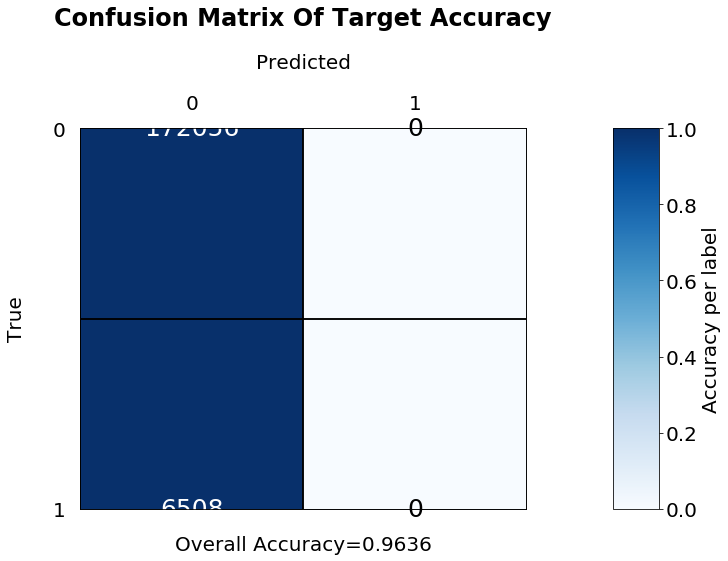

0.4907192972448805


In [119]:
make_confusion_matrix(Y_Test, predictions)

GINI 0.2012746645015362


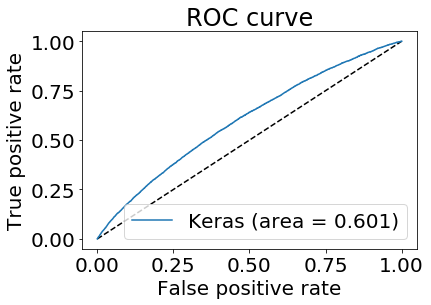

In [120]:
plot_roc_curve(Y_Test, pred)

# Oversampled Data 


In [237]:
x_train_over, x_valid_over, \
y_train_over, y_valid_over  = train_test_split(over_x, 
                                               over_y, 
                                               random_state=42, 
                                               test_size=0.20,
                                               stratify=over_y)

In [ ]:
scaler = StandardScaler() 
x_train_over = scaler.fit_transform(x_train_over) 
x_valid_over = scaler.transform(x_valid_over) 
x_test_over = scaler.transform(X_Test_Shaped)

In [ ]:
class_weights = {0:1, 1:1}

oversampled_model = make_model(x_train_over)
oversampled_model.summary()

In [ ]:
oversampled_history = compile_and_run(oversampled_model, 
                                      x_train_over, 
                                      y_train_over, 
                                      x_valid_over, 
                                      y_valid_over, 
                                      class_weights)

In [ ]:
oversampled_model.evaluate(x_test_over, Y_Test)

In [ ]:
pred_over = oversampled_model.predict(x_test_over)

In [ ]:
over_class_predictions = [int(i) for i in list(tf.greater(pred_over, 0.5))]

In [ ]:
make_confusion_matrix(Y_Test, over_class_predictions)

In [ ]:
plot_roc_curve(Y_Test, pred_over)

# Undersampling

In [85]:
x_train_under, x_valid_under, \
y_train_under, y_valid_under = train_test_split(under_x, 
                                    under_y, 
                                    random_state=42, 
                                    test_size=0.20,
                                    stratify=under_y)

In [86]:
scaler = StandardScaler() 
x_train_under = scaler.fit_transform(x_train_under) 
x_valid_under = scaler.transform(x_valid_under) 
x_test_under = scaler.transform(X_Test_Shaped)

In [87]:
class_weights = {0:1, 1:1}

undersampled_model = make_model(x_train_under)
undersampled_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               38400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 104,449
Trainable params: 104,449
Non-trainable params: 0
_________________________________________________________________


In [88]:
undersampled_history = compile_and_run(undersampled_model, 
                                       x_train_under, 
                                       y_train_under, 
                                       x_valid_under, 
                                       y_valid_under, 
                                       class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [89]:
undersampled_model.evaluate(x_test_under, Y_Test)

178564/178564 [==============================] - 6s 32us/sample - loss: 0.6668 - accuracy: 0.6319


[0.6668413654722484, 0.6318575]

In [90]:
pred_under = undersampled_model.predict(x_test_under)

In [91]:
class_predictions_under = [int(i) for i in list(tf.greater(pred, 0.5))]

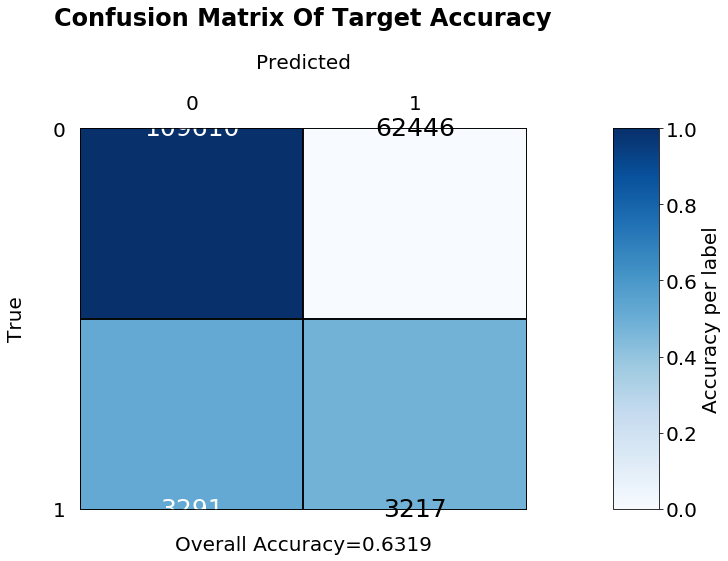

0.4292292174885709


In [92]:
make_confusion_matrix(Y_Test, class_predictions_under)

GINI 0.1934057873740398


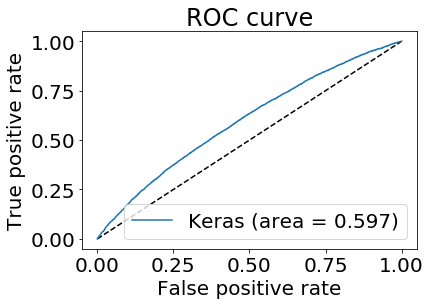

In [93]:
plot_roc_curve(Y_Test, pred_under)

# Hyperparameter Tuning

In [169]:
from tensorflow.keras import optimizers


In [170]:
def make_tuned_model(x_train, dropout_threshold, neurons):
    model = keras.models.Sequential([
        keras.layers.Dense(neurons, activation="relu", 
                           input_shape=x_train.shape[1:]),
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(neurons, activation="relu"), 
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation="sigmoid")
    ]) 
    return model

In [171]:
def compile_and_run(model, x_train, y_train, 
                    x_valid, y_valid, class_weights, 
                    lr, verbose, epochs):
    opt = optimizers.SGD(lr=lr)
    model.compile(loss="binary_crossentropy", 
                  optimizer=opt, 
                  metrics=['accuracy']) 
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                      restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=epochs, 
                        verbose=verbose, 
                        validation_data=(x_valid,y_valid), 
                        callbacks=[early_stopping_cb],
                        class_weight=class_weights)
    return history

In [172]:
def get_gini_keras(Y_Test, pred):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_Test, pred.ravel())
    auc_keras = auc(fpr_keras, tpr_keras)
    return (2 * auc_keras - 1)

In [188]:
params = {
    "dropout":[0,0.2,0.5],
    "neurons":[256, 512],
    "lr":[1, 0.1, 0.01, 0.001],
}

In [176]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.5189137183227522, 1: 13.717919170302082}

In [168]:
x_train, x_valid, y_train, y_valid = train_test_split(X_Train_Shaped, Y_Train, random_state=42, test_size=0.20,stratify=Y_Train)

scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train) 
x_valid = scaler.transform(x_valid) 
x_test = scaler.transform(X_Test_Shaped)

In [181]:
combination = []
for dropout in params["dropout"]:
    for neurons in params["neurons"]:
        for learning_rate in params["lr"]:
            model = make_tuned_model(x_train, dropout, neurons)
            history = compile_and_run(model, x_train, y_train, 
                                     x_valid, y_valid, class_weights,
                                     learning_rate, 0, 30)
            prediction = model.predict(x_test)
            gini_metric = get_gini_keras(Y_Test, prediction)
            combination.append(({
                "dropout":dropout,
                "neurons":neurons,
                "lr":learning_rate,
            },gini_metric, history))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']


ValueError: rate must be a scalar tensor or a float in the range [0, 1), got 5

In [183]:
combination

[({'dropout': 0, 'neurons': 256, 'lr': 1},
  0.2054322154842798,
  <tensorflow.python.keras.callbacks.History at 0x1b0221310>),
 ({'dropout': 0, 'neurons': 256, 'lr': 0.1},
  0.20974505870489035,
  <tensorflow.python.keras.callbacks.History at 0x1d3355ed0>),
 ({'dropout': 0, 'neurons': 256, 'lr': 0.01},
  0.13311169054062777,
  <tensorflow.python.keras.callbacks.History at 0x1d37cae10>),
 ({'dropout': 0, 'neurons': 256, 'lr': 0.001},
  0.18079217318762053,
  <tensorflow.python.keras.callbacks.History at 0x1ea72b490>),
 ({'dropout': 0, 'neurons': 512, 'lr': 1},
  0.20256216019089446,
  <tensorflow.python.keras.callbacks.History at 0x1f65ce0d0>),
 ({'dropout': 0, 'neurons': 512, 'lr': 0.1},
  0.20779068793628142,
  <tensorflow.python.keras.callbacks.History at 0x1a75f4050>),
 ({'dropout': 0, 'neurons': 512, 'lr': 0.01},
  0.1345056689423083,
  <tensorflow.python.keras.callbacks.History at 0x1d301b3d0>),
 ({'dropout': 0, 'neurons': 512, 'lr': 0.001},
  0.17262136269636663,
  <tensorflow.p

In [186]:
sortedlist = sorted(combination, key=lambda x: x[1], reverse=True)

In [187]:
sortedlist

[({'dropout': 0.5, 'neurons': 256, 'lr': 0.1},
  0.21127283954290088,
  <tensorflow.python.keras.callbacks.History at 0x1d80066d0>),
 ({'dropout': 0.5, 'neurons': 512, 'lr': 0.1},
  0.2106863804209027,
  <tensorflow.python.keras.callbacks.History at 0x1daa3fb90>),
 ({'dropout': 0.5, 'neurons': 256, 'lr': 0.001},
  0.2105370234870716,
  <tensorflow.python.keras.callbacks.History at 0x1d8371fd0>),
 ({'dropout': 0, 'neurons': 256, 'lr': 0.1},
  0.20974505870489035,
  <tensorflow.python.keras.callbacks.History at 0x1d3355ed0>),
 ({'dropout': 0.2, 'neurons': 512, 'lr': 0.1},
  0.20839962816097168,
  <tensorflow.python.keras.callbacks.History at 0x1e47c1890>),
 ({'dropout': 0, 'neurons': 512, 'lr': 0.1},
  0.20779068793628142,
  <tensorflow.python.keras.callbacks.History at 0x1a75f4050>),
 ({'dropout': 0.5, 'neurons': 512, 'lr': 0.001},
  0.20584629358677953,
  <tensorflow.python.keras.callbacks.History at 0x1d9ffe650>),
 ({'dropout': 0.2, 'neurons': 512, 'lr': 1},
  0.20583028273352144,
  <

In [196]:
history_to_plot = sortedlist[0][2]

In [240]:
history_to_plot.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Load in the prediction data

In [243]:
cols_to_keep = X_Train_Shaped.columns

In [244]:
cols_to_keep

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_03',
       ...
       'ps_car_11_cat_95', 'ps_car_11_cat_96', 'ps_car_11_cat_97',
       'ps_car_11_cat_98', 'ps_car_11_cat_99', 'ps_car_11_cat_100',
       'ps_car_11_cat_101', 'ps_car_11_cat_102', 'ps_car_11_cat_103',
       'ps_car_11_cat_104'],
      dtype='object', length=149)